In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import math

In [3]:
'''
附加信息

数据集由 10 个数值属性和 8 个分类属性组成。
“收入”属性可用作类标签。

“管理”、“管理持续时间”、“信息性”、“信息性持续时间”、“产品相关”和“产品相关持续时间”表示访问者在该会话中访问的不同类型的页面数量以及在每个页面类别中花费的总时间。这些功能的值来自用户访问的页面的URL信息，并在用户采取行动（例如从一个页面移动到另一个页面）时实时更新。“跳出率”、“退出率”和“页面价值”功能代表“Google Analytics”针对电子商务网站中每个页面测量的指标。网页的“跳出率”功能的值是指从该页面进入网站然后离开（“跳出”）的访问者的百分比，而不会在该会话期间触发对分析服务器的任何其他请求。特定网页的“退出率”功能值的计算方式为该网页的所有网页浏览量，即会话中最后一个网页浏览量的百分比。“页面价值”功能表示用户在完成电子商务交易之前访问的网页的平均值。“特殊日子”功能表示网站访问时间与特定特殊日子（例如母亲节、情人节）的接近程度，在该日子中，会话更有可能通过交易完成。此属性的值是通过考虑电子商务的动态（例如订单日期和交货日期之间的持续时间）来确定的。例如，对于瓦伦蒂娜节，此值在 2 月 12 日至 1 月 8 日之间采用非零值，在此日期之前和之后为零，除非接近另一个特殊日子，并且在 <> 月 <> 日采用最大值 <>。该数据集还包括操作系统、浏览器、区域、流量类型、作为回访者或新访客的访客类型、指示访问日期是周末还是一年中的月份的布尔值。
'''

'\n附加信息\n\n数据集由 10 个数值属性和 8 个分类属性组成。\n“收入”属性可用作类标签。\n\n“管理”、“管理持续时间”、“信息性”、“信息性持续时间”、“产品相关”和“产品相关持续时间”表示访问者在该会话中访问的不同类型的页面数量以及在每个页面类别中花费的总时间。这些功能的值来自用户访问的页面的URL信息，并在用户采取行动（例如从一个页面移动到另一个页面）时实时更新。“跳出率”、“退出率”和“页面价值”功能代表“Google Analytics”针对电子商务网站中每个页面测量的指标。网页的“跳出率”功能的值是指从该页面进入网站然后离开（“跳出”）的访问者的百分比，而不会在该会话期间触发对分析服务器的任何其他请求。特定网页的“退出率”功能值的计算方式为该网页的所有网页浏览量，即会话中最后一个网页浏览量的百分比。“页面价值”功能表示用户在完成电子商务交易之前访问的网页的平均值。“特殊日子”功能表示网站访问时间与特定特殊日子（例如母亲节、情人节）的接近程度，在该日子中，会话更有可能通过交易完成。此属性的值是通过考虑电子商务的动态（例如订单日期和交货日期之间的持续时间）来确定的。例如，对于瓦伦蒂娜节，此值在 2 月 12 日至 1 月 8 日之间采用非零值，在此日期之前和之后为零，除非接近另一个特殊日子，并且在 <> 月 <> 日采用最大值 <>。该数据集还包括操作系统、浏览器、区域、流量类型、作为回访者或新访客的访客类型、指示访问日期是周末还是一年中的月份的布尔值。\n'

In [71]:
filepath_onlineshop = '../data/onlineShop/online_shoppers_intention.csv'
filepath_drybean = '../data/DryBeanDataset/Dry_Bean_Dataset.csv'
# data_df = pd.read_csv(filepath_onlineshop,sep=",")
data_df = pd.read_csv(filepath_drybean,sep=",",encoding='utf-8')

In [12]:
print("="*50,'数据大小',"="*50)
print(data_df.shape)
print("="*50,'数据基本格式',"="*50)
print(data_df.describe())
print("="*50,f'数据前{5}项',"="*50)
print(data_df.head(5))
print("="*50,'各列数据类型',"="*50)
print(data_df.dtypes)

================================================== 数据大小 ==================================================
(13611, 17)
================================================== 数据基本格式 ==================================================
                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.

In [6]:
'''
Administrative            管理的
Administrative_Duration   管理持续时间
Informational             信息性
Informational_Duration    信息_持续时间
ProductRelated            产品相关
ProductRelated_Duration   产品相关持续时间
BounceRates               反弹率
ExitRates                 退出率
PageValues                页面值
SpecialDay                特惠日
Month                     月
OperatingSystems          操作系统
Browser                   浏览器
Region                    区域
TrafficType               流量类型
VisitorType               访问者类型
Weekend                   周末
Revenue                   收入
'''

'\nAdministrative            管理的\nAdministrative_Duration   管理持续时间\nInformational             信息性\nInformational_Duration    信息_持续时间\nProductRelated            产品相关\nProductRelated_Duration   产品相关持续时间\nBounceRates               反弹率\nExitRates                 退出率\nPageValues                页面值\nSpecialDay                特惠日\nMonth                     月\nOperatingSystems          操作系统\nBrowser                   浏览器\nRegion                    区域\nTrafficType               流量类型\nVisitorType               访问者类型\nWeekend                   周末\nRevenue                   收入\n'

In [15]:
# 最大one-hot大小
MaxCountNum = 60
data_df_counts = []
onehotDataName = []
for k in data_df.keys():
    data_df_counts.append([k,data_df[k].value_counts()])
    if len(data_df[k].value_counts()) < MaxCountNum:
        onehotDataName.append([k,data_df[k].value_counts()])
        # 符合onehot条件的标签
        # print(k)
# print(onehotDataName)
# print([[i[0],len(i[1])] for i in data_df_counts])
print([i[1].keys for i in onehotDataName])
# print([i[1].values for i in onehotDataName])

[<bound method Series.keys of Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64>]


In [55]:
def pltbar(x,y):
    plt.bar(x,y)
    plt.xticks(range(len(x)),x)
    plt.show()
    
def pltpoint(x,y):
    plt.scatter(x,y)
    plt.show()

def pltpie(x, lable = None, lableNum=0,pctdistance = 0.6,pieinterval = 1):
    # 通过lableSize区间确定pieinterval的值
    if lableNum == 0 or isinstance(lable,np.ndarray):
        print("auto operation pctdistance and lableNum")
        lableNum = x.size
        if lableNum>20:
            pieinterval = 0.6
        elif lableNum >10:
            pieinterval = 0.3
        elif lableNum > 2:
            pieinterval = 0.2
        else: 
            pieinterval = 0.1
    # 分配每个扇区与中心的距离
    explode = [(i+1)/lableNum*pieinterval for i in range(lableNum)]
    plt.pie(x,labels=lable,autopct="%0.2f%%",pctdistance = pctdistance,explode=explode)
    plt.show()

In [56]:
def sparseData(data_df,MaxCountNum = 60):
    sparseList = []
    denceList = []
    # 类型少的数据分布
    for k in data_df.keys():
        data_df_counts.append([k,data_df[k].value_counts()])
        if len(data_df[k].value_counts()) < MaxCountNum:
            mes_k_count = data_df[k].value_counts()
            x = mes_k_count.index.values
            y = mes_k_count.values
            # print(x,'\n',y)
            pltpie(y,lable = x)
            sparseList.append(k)
        else:
            denceList.append(k)
    return sparseList,denceList


def getOneDataPie(data_df,idx):
    # 数据样本与各类的相关性
    # datalist = data_df_counts[-1]
    mes_k_count = data_df[data_df.keys()[idx]].value_counts()
    x = mes_k_count.index.values
    y = mes_k_count.values
    pltpie(y,lable = x)
    return data_df.keys()[idx]

def dataIsNull():
    nullDataList = data_df.isnull().value_counts()# 查看数据是否有空值
    print(nullDataList)

auto operation pctdistance and lableNum


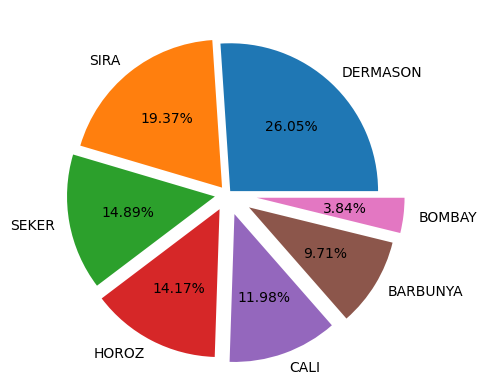

['Class'] 

 ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']


In [57]:
classifityData = sparseData(data_df,MaxCountNum)
print(classifityData[0],'\n\n',classifityData[1])

In [83]:
data_df.iloc[[0,1],[1]] = None

In [86]:
nullDataList = data_df.isnull().any()# 查看数据是否有空值

In [82]:
data_df.fillna(0)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,0.000,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,0.000,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
